# Exploratory Data Analysis

### Database PI-CAI 
https://github.com/DIAGNijmegen/picai_labels/blob/main/clinical_information/marksheet.csv

### Challenge website
https://pi-cai.grand-challenge.org/

### Reference bibtex:
@ARTICLE{PICAI_BIAS,
    author = {Anindo Saha, Jasper J. Twilt, Joeran S. Bosma, Bram van Ginneken, Derya Yakar, Mattijs Elschot, Jeroen Veltman, Jurgen Fütterer, Maarten de Rooij, Henkjan Huisman},
    title  = {{Artificial Intelligence and Radiologists at Prostate Cancer Detection in MRI: The PI-CAI Challenge (Study Protocol)}}, 
    year   = {2022},
    doi    = {10.5281/zenodo.6667655}
}

### License:
CC BY-NC 4.0

## Step 0. Loading some libraries, packages, and database

In [1]:
import sys
print('Python version: ', sys.version[0:6])

Python version:  3.11.7


In [2]:
# Run the following command to ensure that the latest version of pip is installed:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Loading main libraries 
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Another Visualization library
print('seaborn version:    ',sns.__version__) 
import numpy as np               # Basic mathematics
print('numpy version:      ',np.__version__)
import os                        # OS options in line with Python
import pandas as pd              # Dataframes library
print('pandas version:     ',pd.__version__)

seaborn version:     0.13.2
numpy version:       1.24.4
pandas version:      2.1.3


In [4]:
# Loading database
url = 'https://github.com/DIAGNijmegen/picai_labels/blob/main/clinical_information/marksheet.csv?raw=true'
data = pd.read_csv(url)

## Step 1. Descriptive Analysis

### 1.1. Display the content of the data table that we just loaded

In [5]:
data.head(10)  # Similarly in R, use view() ; str() ; summary()

,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,case_ISUP,case_csPCa
0,10000,1000000,2019-07-02,73,7.70,NaN,55.0,MRBx,0+0,0,0,NO
1,10001,1000001,2016-05-27,64,8.70,0.09,102.0,NaN,NaN,NaN,0,NO
2,10002,1000002,2021-04-18,58,4.20,0.06,74.0,NaN,NaN,NaN,0,NO
3,10003,1000003,2019-04-05,72,13.00,NaN,71.5,SysBx,0+0,0,0,NO
4,10004,1000004,2020-10-21,67,8.00,0.10,78.0,SysBx+MRBx,"0+0,0+0","0,0",0,NO
5,10005,1000005,2012-07-18,64,12.10,0.24,51.0,MRBx,"4+3,0+0","3,0",3,YES
6,10006,1000006,2020-10-23,73,6.20,0.23,27.0,SysBx+MRBx,"0+0,3+3","0,1",1,NO
7,10007,1000007,2020-10-31,68,3.83,0.09,41.0,SysBx+MRBx,3+3,1,1,NO
8,10008,1000008,2020-12-06,81,11.10,0.20,56.0,SysBx+MRBx,"4+3,3+4","3,2",3,YES
9,10009,1000009,2017-11-02,65,24.00,NaN,120.0,SysBx,0+0,0,0,NO


### 1.2. Display the internal structure of the data table

It indicates in a compact way the type of variables. The presence of missing values can be seen

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       1500 non-null   int64  
 1   study_id         1500 non-null   int64  
 2   mri_date         1500 non-null   object 
 3   patient_age      1500 non-null   int64  
 4   psa              1460 non-null   float64
 5   psad             1049 non-null   float64
 6   prostate_volume  1473 non-null   float64
 7   histopath_type   1001 non-null   object 
 8   lesion_GS        1001 non-null   object 
 9   lesion_ISUP      1001 non-null   object 
 10  case_ISUP        1500 non-null   int64  
 11  case_csPCa       1500 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 140.8+ KB


### 1.3. Display a general summary statistics of the variables in the table
showing the values: minimum, maximum, mean, median, first and third quartile for numerical variables

In [7]:
data.describe()

,patient_id,study_id,patient_age,psa,psad,prostate_volume,case_ISUP
count,1500.000000,1.500000e+03,1500.000000,1460.000000,1049.000000,1473.000000,1500.000000
mean,10735.602667,1.000750e+06,65.595333,11.932397,0.224662,65.045472,0.942000
std,425.311791,4.331570e+02,7.191527,14.939071,0.404288,36.449618,1.333099
min,10000.000000,1.000000e+06,35.000000,0.100000,0.010000,4.000000,0.000000
25%,10368.750000,1.000375e+06,61.000000,5.882500,0.090000,40.000000,0.000000
50%,10733.500000,1.000750e+06,66.000000,8.500000,0.140000,57.000000,0.000000
75%,11101.250000,1.001124e+06,70.000000,13.000000,0.220000,80.000000,2.000000
max,11475.000000,1.001499e+06,92.000000,224.000000,7.000000,308.000000,5.000000


A more general summary with all the variables, not only the numerical ones

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,1500.0,NaN,NaN,NaN,10735.602667,425.311791,10000.0,10368.75,10733.5,11101.25,11475.0
study_id,1500.0,NaN,NaN,NaN,1000749.5,433.157015,1000000.0,1000374.75,1000749.5,1001124.25,1001499.0
mri_date,1500,1098,2020-03-25,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_age,1500.0,NaN,NaN,NaN,65.595333,7.191527,35.0,61.0,66.0,70.0,92.0
psa,1460.0,NaN,NaN,NaN,11.932397,14.939071,0.1,5.8825,8.5,13.0,224.0
psad,1049.0,NaN,NaN,NaN,0.224662,0.404288,0.01,0.09,0.14,0.22,7.0
prostate_volume,1473.0,NaN,NaN,NaN,65.045472,36.449618,4.0,40.0,57.0,80.0,308.0
histopath_type,1001,4,MRBx,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lesion_GS,1001,111,0+0,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lesion_ISUP,1001,63,0,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4. Number of different categories

In [9]:
data.nunique()

patient_id         1476
study_id           1500
mri_date           1098
patient_age          49
psa                 343
psad                101
prostate_volume     244
histopath_type        4
lesion_GS           111
lesion_ISUP          63
case_ISUP             6
case_csPCa            2
dtype: int64

### Conclusions

The main characteristics of the data table are:
* The total number of observations in the data set is nnn.
* The total number of variables is mmm, m1 of AAA type, m2 of BBB type.
* The time range covers from DATE1 to DATE2.
* Presents rrr variables of the CCC type.

### 1.4. Graphics representation of numerical variables

Histograms, line graphs, bars or sectors, among others, to observe the behavior of the data distribution.

#### Let's separate Numerical variables from the rest of the variables
Let's name them all as Categorical

In [10]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical Variables:")
print(num_cols)

cat_cols=data.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Variables:")
print(cat_cols)


Numerical Variables:
['patient_id', 'study_id', 'patient_age', 'psa', 'psad', 'prostate_volume', 'case_ISUP']

Categorical Variables:
['mri_date', 'histopath_type', 'lesion_GS', 'lesion_ISUP', 'case_csPCa']


#### 1.4.1. EDA Numerical Variables Univariate Analysis

patient_id


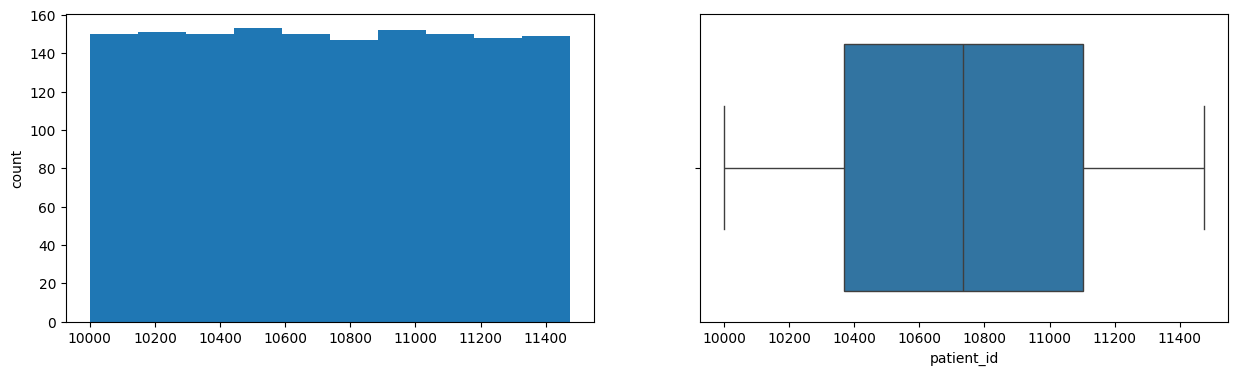

study_id


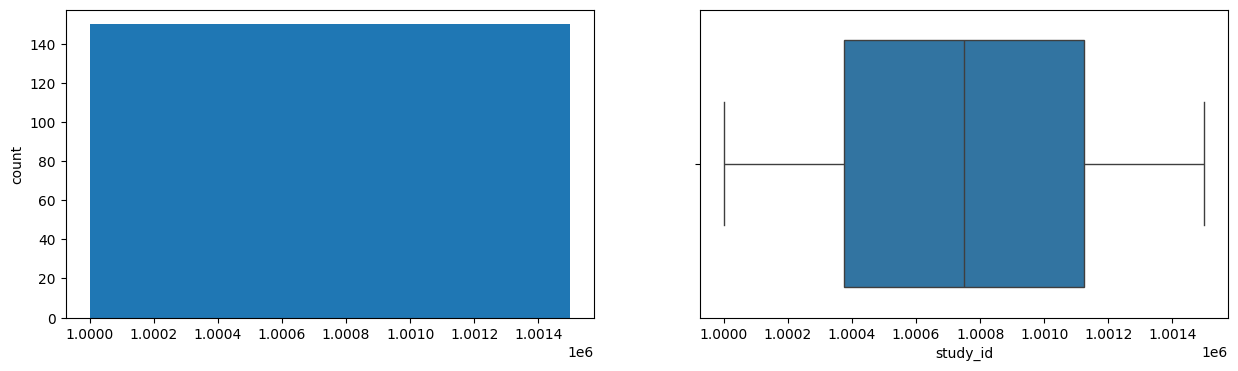

patient_age


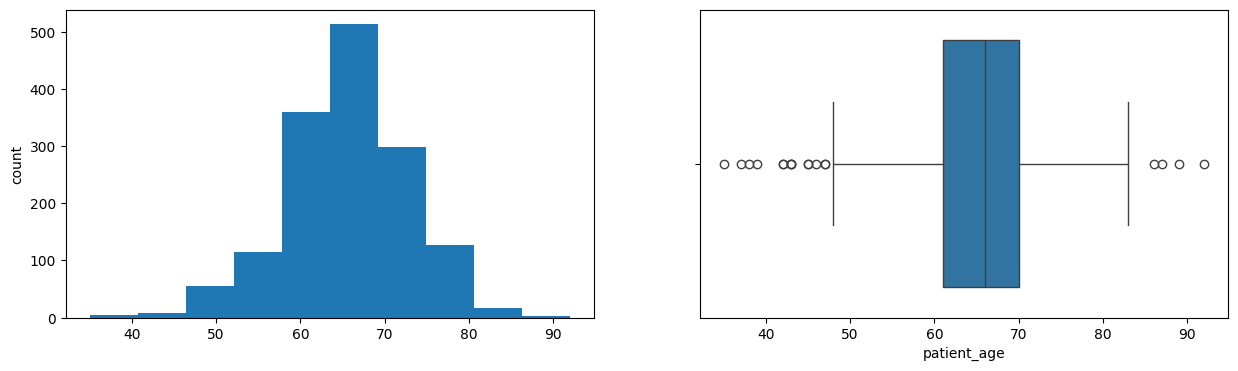

psa


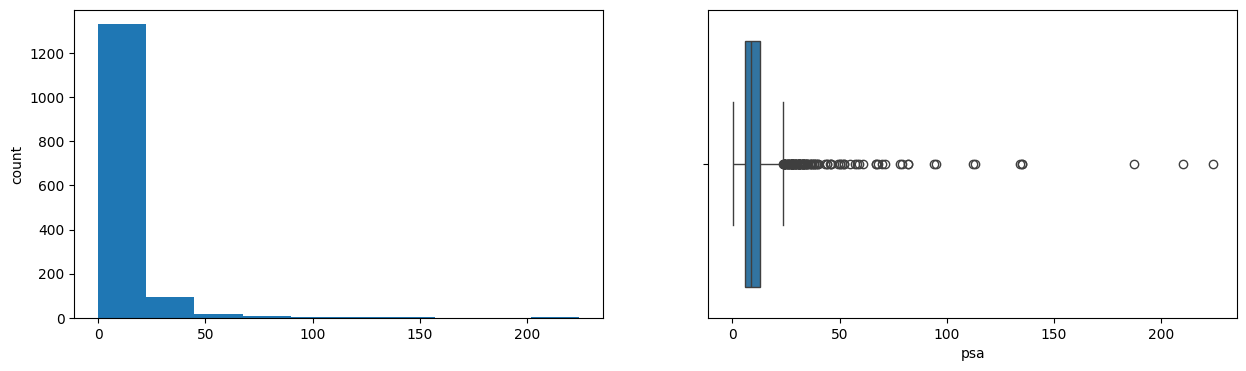

psad


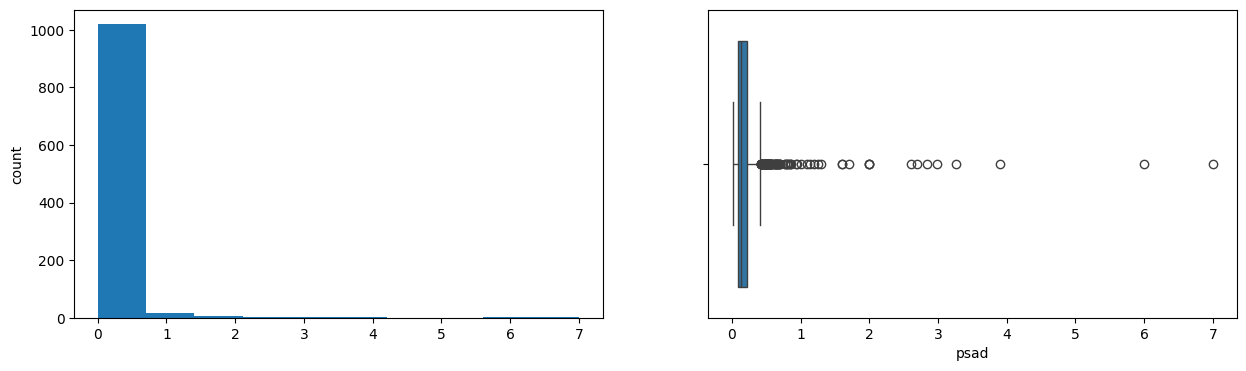

prostate_volume


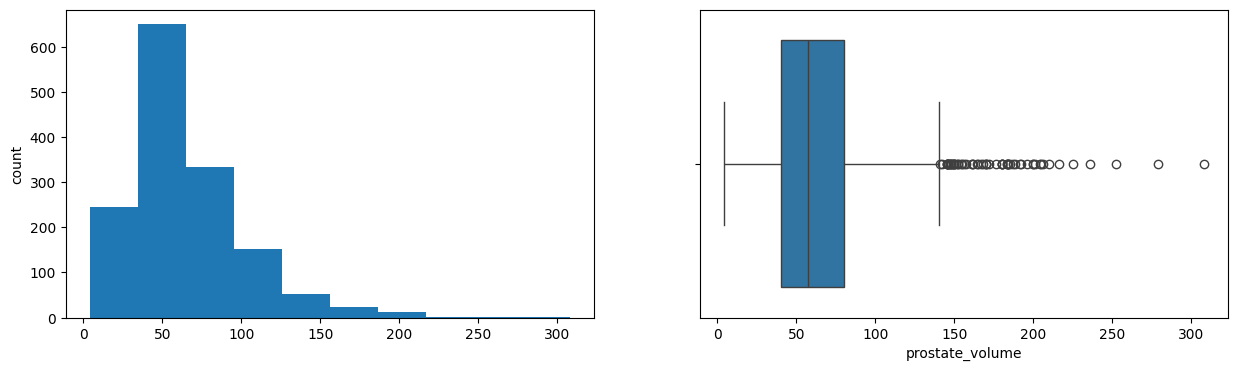

case_ISUP


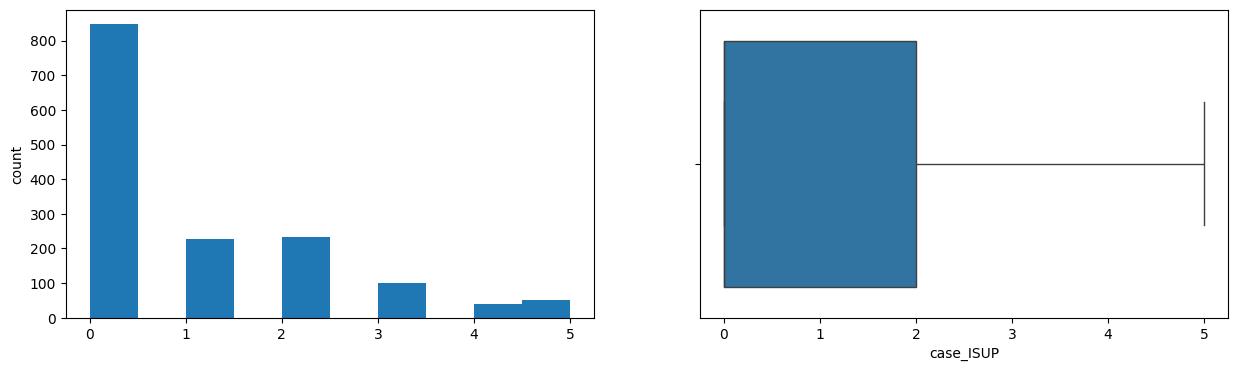

In [11]:
# Histograms and Boxplots

for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)  # Histogram 
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])  # Boxplot
    plt.show()

patient_id


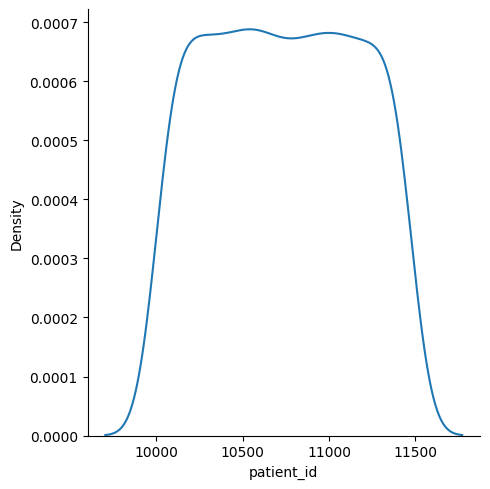

study_id


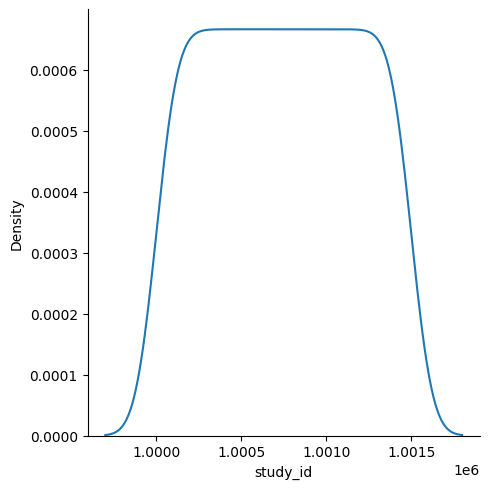

patient_age


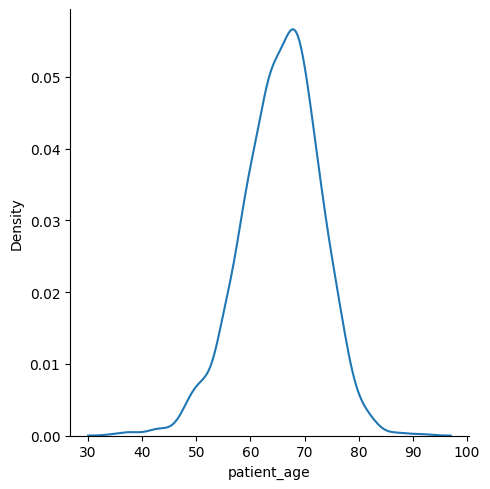

psa


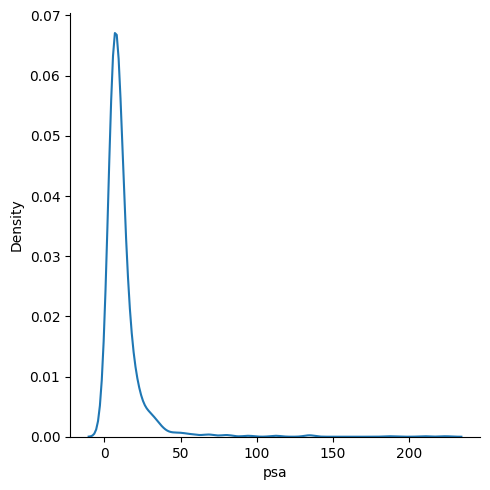

psad


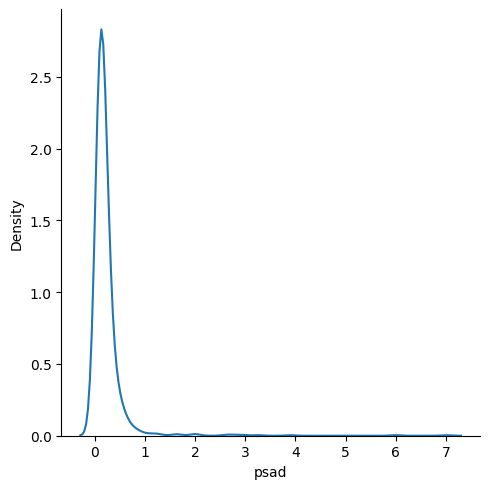

prostate_volume


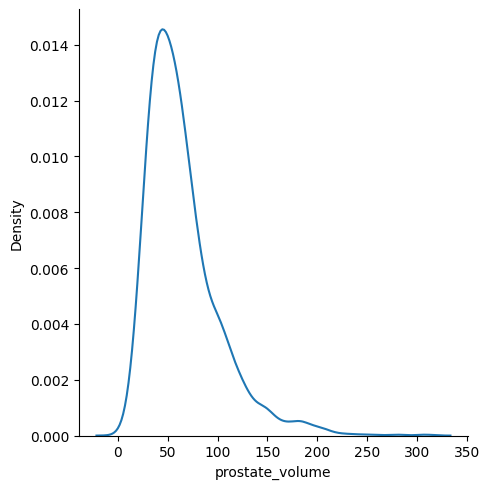

case_ISUP


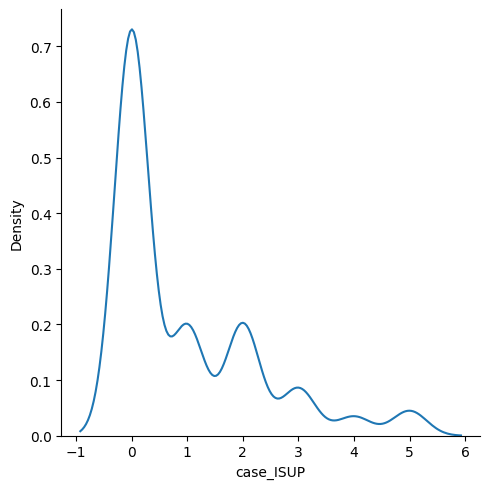

In [12]:
# Density Distribution plot (kind="ecdf")

for col in num_cols:
    print(col)
    sns.displot(data=data[col], kind="kde") 
    plt.show()

### Conclusions

For instance: "Observing the histograms of the variables, we can conclude that they present a distribution skewed to the left, with values closer to 0, although this bias is much more pronounced in the XXX variable."

#### 1.4.2. EDA Categorical Variables Univariate Analysis

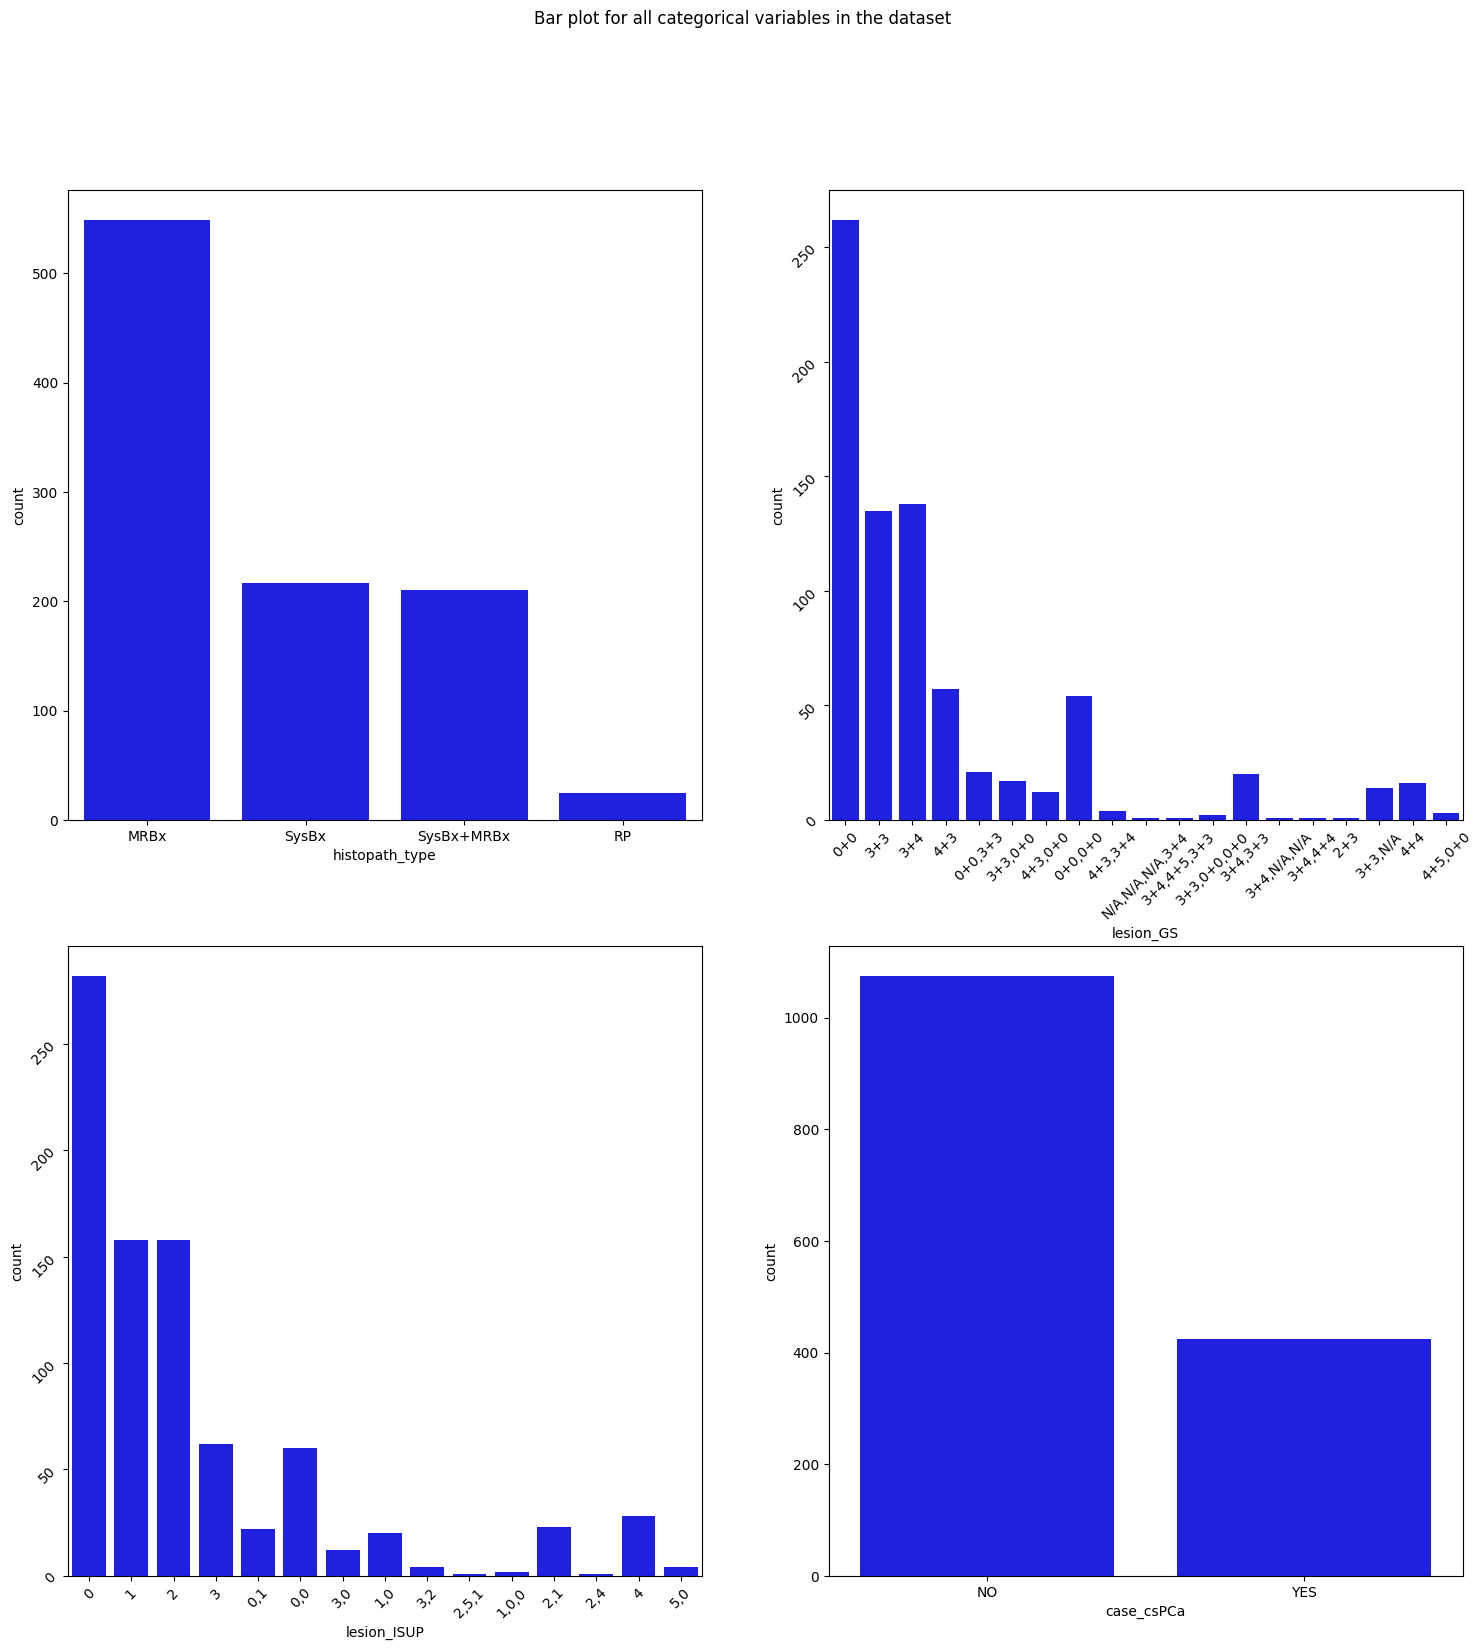

In [13]:
# Barplots

fig, axes = plt.subplots(2, 2, figsize = (18, 18))

fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'histopath_type', data = data, color = 'blue', 
              order = data['histopath_type'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'lesion_GS', data = data, color = 'blue', 
              order = data['lesion_GS'].head(100).value_counts().index);

sns.countplot(ax = axes[1, 0], x = 'lesion_ISUP', data = data, color = 'blue', 
              order = data['lesion_ISUP'].head(100).value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'case_csPCa', data = data, color = 'blue', 
              order = data['case_csPCa'].value_counts().index);

axes[0][1].tick_params(labelrotation=45);
axes[1][0].tick_params(labelrotation=45);

### Conclusions

For instance: Number of different categories, possible wrong encoding, ...

#### 1.4.3. EDA Numerical Variables Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

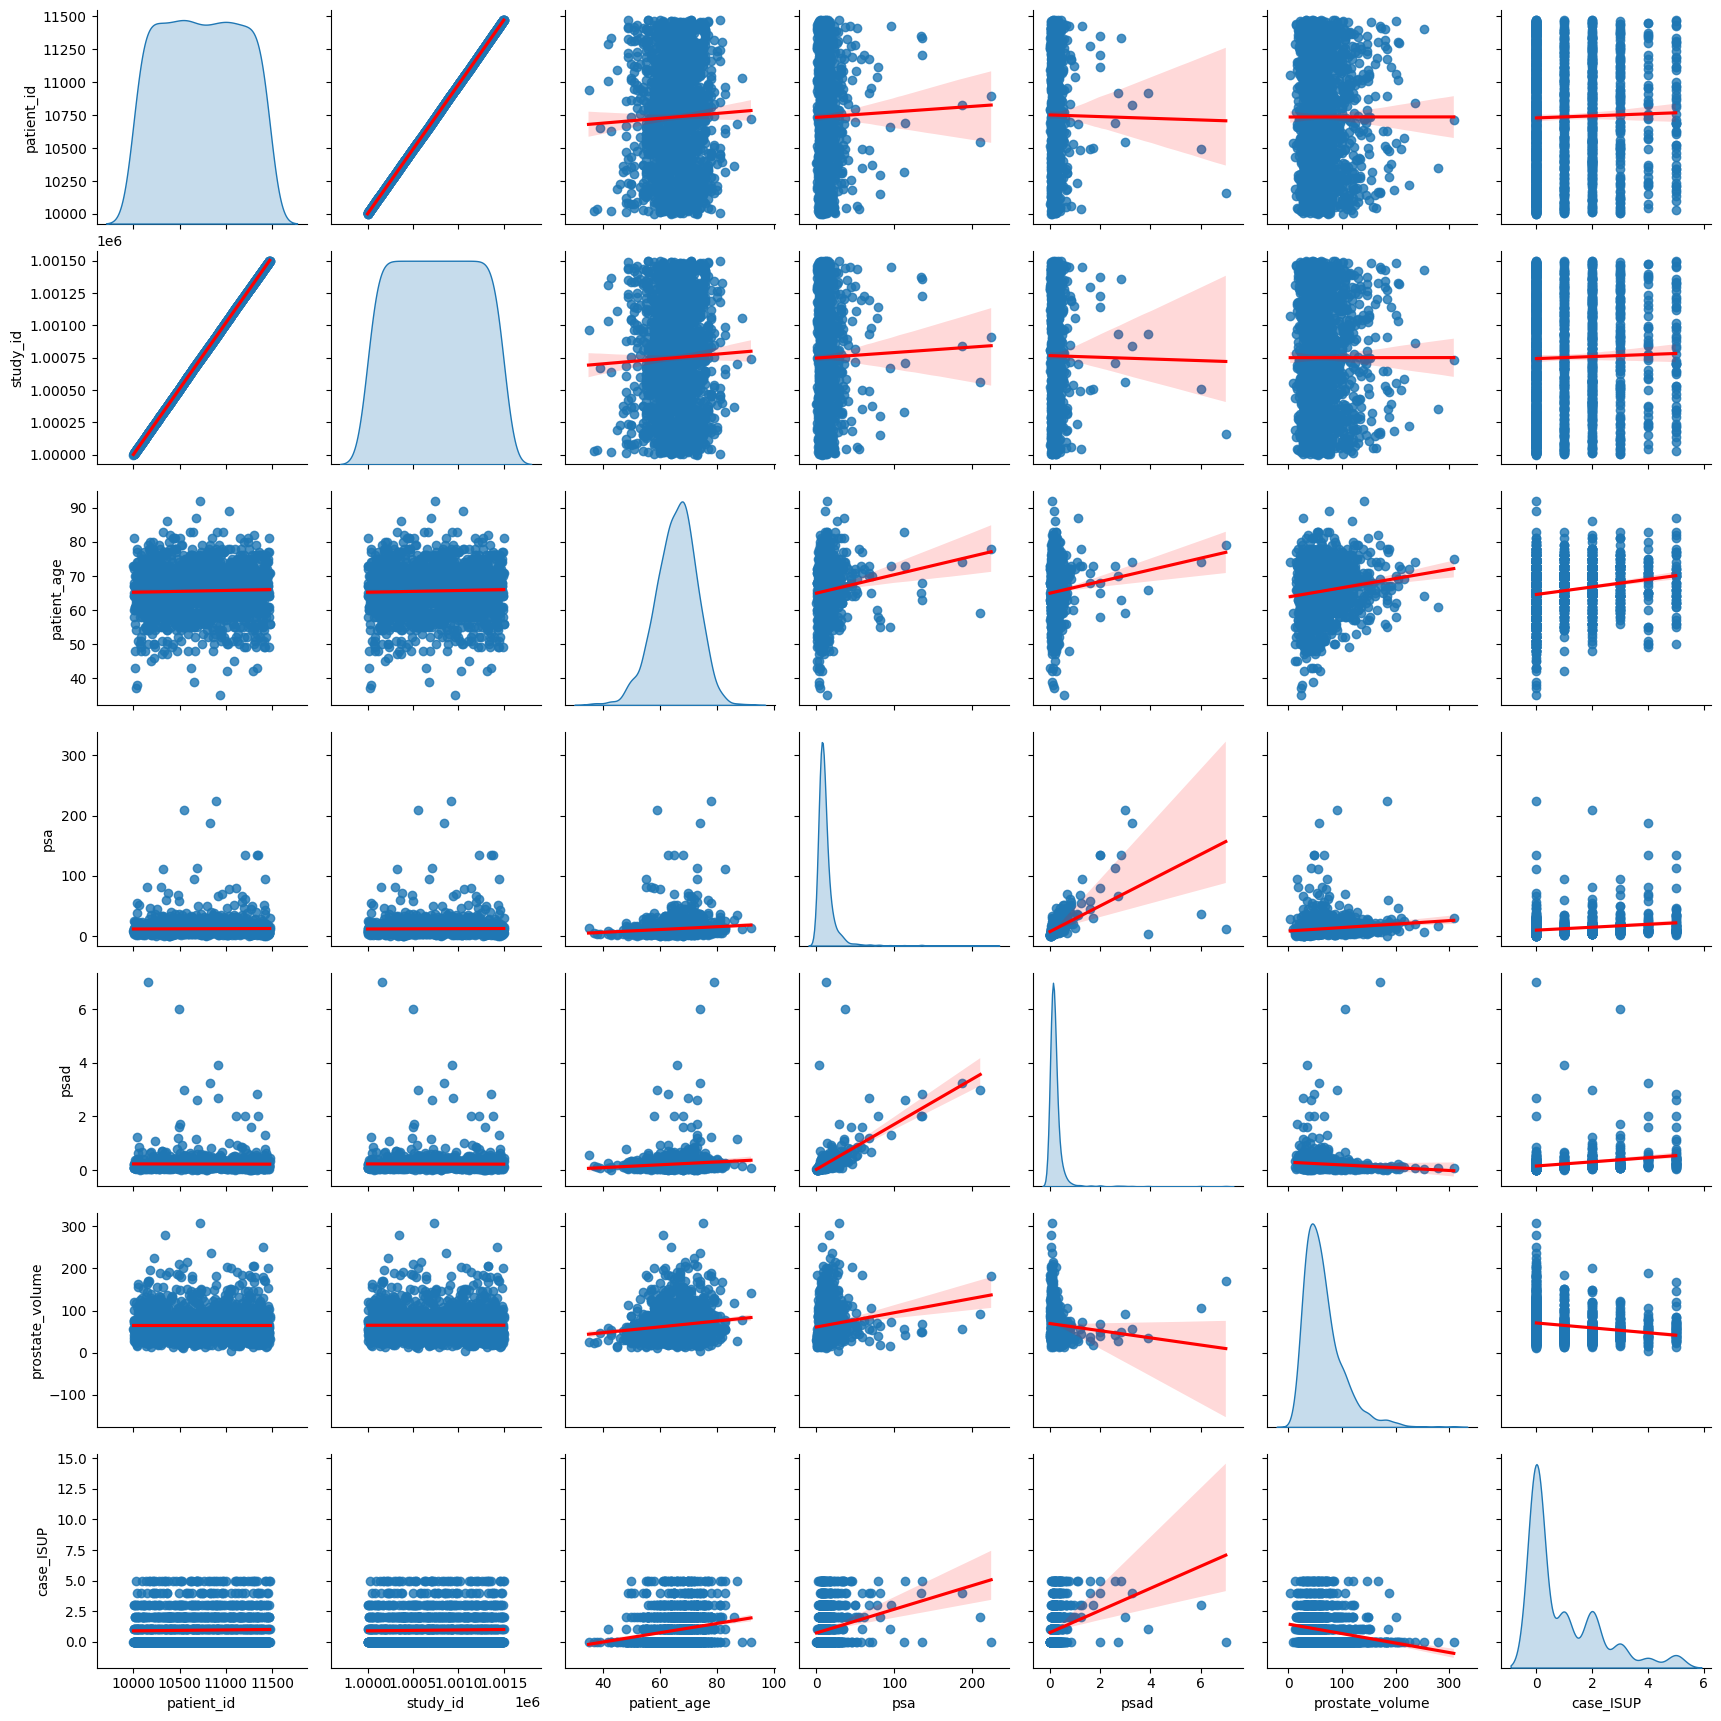

In [14]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

### Conclusions

For instance: Highly correlation, ....

## Step 2. Variable Types Conversion

Let's remember

In [ ]:
# Loading database
url = 'https://github.com/DIAGNijmegen/picai_labels/blob/main/clinical_information/marksheet.csv?raw=true'
data = pd.read_csv(url)
data.info()

### 2.1. Conversion from string to datetime, then to float

In [ ]:
# Convert the date string in 'mri-date' to a datetime object
date_objects = pd.to_datetime(data['mri_date'])

# Convert datetime object in 'mri-date' to Unix timestamps (float64 numbers)
data['mri_date'] = date_objects.astype(int)/ 10**9  # Convert nanoseconds to seconds

data.info()

### 2.2. Conversion from integer to float

In [ ]:
# Convert int64 features to float64
data['patient_id'] = data['patient_id'].astype("float64")
data['study_id'] = data['study_id'].astype("float64")
data['patient_age'] = data['patient_age'].astype("float64")
data['case_ISUP'] = data['case_ISUP'].astype("float64")

data.info()

### 2.3. Conversion from logical/string (object) to float

In [ ]:
# Mapping for conversion in 'case_csPCa' and handling NaN
mapping = {"YES": 1.0, "NO": 0.0}
data['case_csPCa'] = data['case_csPCa'].map(mapping).fillna(np.nan)

... and this is the result

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       1500 non-null   int64  
 1   study_id         1500 non-null   int64  
 2   mri_date         1500 non-null   object 
 3   patient_age      1500 non-null   int64  
 4   psa              1460 non-null   float64
 5   psad             1049 non-null   float64
 6   prostate_volume  1473 non-null   float64
 7   histopath_type   1001 non-null   object 
 8   lesion_GS        1001 non-null   object 
 9   lesion_ISUP      1001 non-null   object 
 10  case_ISUP        1500 non-null   int64  
 11  case_csPCa       1500 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 140.8+ KB


### 2.4. A mapping Conversion a bit more complicated

In [ ]:
# Create a mapping for conversion from labels to numbers excluding pairs with NaN values
list_labels_histopath = list(data['histopath_type'].dropna().unique())
list_numbers_histopath = list(range(1,len(list_labels_histopath)+1))

mapping = dict(zip(list_labels_histopath,list_numbers_histopath))

data['histopath_type'] = data['histopath_type'].map(mapping)

data.info()

### Conclusions

For instance: informative data,....

## Step 3. Missing Data Detection

### 3.1. Let's start with a Reduced Significative Dataset

In [16]:
# List of feature names to extract
features_to_extract = ['patient_age', 'psa', 'psad', 'prostate_volume', 'case_ISUP', 'case_csPCa']

data_reduced = data[features_to_extract]

data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_age      1500 non-null   int64  
 1   psa              1460 non-null   float64
 2   psad             1049 non-null   float64
 3   prostate_volume  1473 non-null   float64
 4   case_ISUP        1500 non-null   int64  
 5   case_csPCa       1500 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 70.4+ KB


### 3.2. Missing Data Discovery
Number and Percentage

In [ ]:
from numpy import nan
data_working = data_reduced

data_working.isnull().sum()

In [ ]:
data_working.isnull().mean()*100

### 3.4. Simple Data Imputation

#### 3.3.1 The easiest strategy. Remove rows with missing values

data_working.dropna(axis=0, how='any', subset=None, inplace=False)

#### 3.3.1 Impute missing values with the mean

In [ ]:
data_working = data_reduced

# fill missing values with mean column values
data_imputed_mean = data_working.fillna(data_working.mean())

# count the number of NaN values in each column
data_imputed_mean.head(20)

In [ ]:
data_working.head(20)

In [ ]:
data_imputed_mean.isnull().mean()*100

### Conclusions

For instance: what I did with missing data is XXX because YYY.

## Step 4. Outliers Detection

#### 4.1. Continuous Variables

In [ ]:
num_cols = data_imputed_mean.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical Variables:")
print(num_cols)

# Histograms and Boxplots

for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    sns.boxplot(x=data_imputed_mean[col])  # Boxplot
    plt.show()

#### 4.2. Removing Outliers (IQR-based)

In [ ]:
data_imputed_mean.describe()

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
data_im_outlier = data_imputed_mean
for col in num_cols:
    print(col)
    lowerbound,upperbound = outlier_treatment(data_im_outlier[col])
    data_im_outlier.drop(data_im_outlier[ (data_im_outlier[col] > upperbound) | (data_im_outlier[col] < lowerbound) ].index, inplace=True)


In [ ]:
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    sns.boxplot(x=data_im_outlier[col])  # Boxplot
    plt.show()

## Step 5. Correlation Analysis

### EDA Numerical Variables Bivariate Analysis

In [ ]:
data_im_outlier.info()

### 5.1. Scatterplot

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data_im_outlier, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

### 5.1. Cluster Map of the correlation matrix

In [ ]:
# Create a Cluster Map of the correlation matrix
sns.clustermap(data_im_outlier.corr(), annot=True, cmap="coolwarm", figsize=(8, 6))
plt.title("Cluster Map of Marketsheet_reduced Dataset Correlation")
plt.show()